In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Part A: Conceptual Questions


#### What is a Decision Tree and how does it make decisions?

A Decision Tree is a supervised learning algorithm used for classification and regression.
It makes decisions by splitting data step-by-step based on feature values, forming a tree-like structure where:

internal nodes → feature tests

branches → decision rules

leaf nodes → final prediction

### What does a split criterion mean in a Decision Tree?

A split criterion is the rule used to choose the best feature and threshold to split the data at each node.
It measures how well a split separates the data into pure groups.
Common criteria include Gini Impurity and Entropy.

### Difference between Gini Impurity and Entropy

Gini Impurity measures how often a randomly chosen sample would be misclassified.

Entropy measures the amount of uncertainty or randomness in the data.

Gini is faster to compute, while Entropy is more theoretically informative, but both usually give similar results.

### Why do Decision Trees tend to overfit?

Decision Trees tend to overfit because they:

Keep splitting until they perfectly classify training data

Learn noise and outliers

Create very deep and complex trees

This results in low bias but high variance.

### What role does the max_depth parameter play?

max_depth controls the maximum number of levels in the tree.

Small max_depth → simpler tree → reduces overfitting

Large max_depth → complex tree → higher risk of overfitting

It helps balance the bias–variance tradeoff.

# Part B: Data Exploration


Load the dataset and display:

Shape of the dataset

Column names

First 5 rows

Identify:

Target column

Feature columns

Check and report:

Missing values

Data types


In [8]:
data.shape

(1025, 14)

In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
data[['target']]

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [13]:
data.drop('target',axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [14]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Part C: Data Preprocessing


Handle missing values (if any).

Separate:

Features (X)

Target (y)

Split the dataset:

Training set – 80%

Testing set – 20%

Use random_state=42


In [22]:
X=data.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [23]:
y=data[['target']]
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((820, 13), (205, 13), (820, 1), (205, 1))

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt=DecisionTreeClassifier(criterion='gini',random_state=42)

In [30]:
dt

DecisionTreeClassifier(random_state=42)

In [31]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
dt.score(X_train,y_train)

1.0

In [36]:
y_pred=dt.predict(X_test)

# Part E: Model Evaluation

Compute:

Accuracy score

Confusion matrix (visit this after evaluation metrics for classification are taught)

Classification report (visit this after evaluation metrics for classification are taught)

Answer:

Which class is predicted better?

Is the model overfitting or underfitting?


In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [38]:
accuracy_score(y_test,y_pred)

0.9853658536585366

In [40]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[102   0]
 [  3 100]]


In [41]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Which class is predicted better?
Recall for Class 0 = 1.00 → all actual class 0 samples were correctly identified

Zero misclassifications for class 0

Class 1 has 3 false negatives

### Is the model overfitting or underfitting?
Overall accuracy is 99%

Precision, recall, and F1-score are balanced and high

No major class imbalance or performance drop

Since:

Errors are minimal

No evidence of bias toward one class

Metrics are consistent

The model generalizes well.

# Part F: Understanding Tree Depth (Manual Experiment)

Train three models by changing only max_depth:

Model

max_depth

Model 1

2

Model 2

5

Model 3

None

For each model, record:

Training accuracy

Testing accurac


In [48]:
dt1=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=2)
dt1.fit(X_train,y_train)
print('Training_accuracy_max_depth2:',dt1.score(X_train,y_train))
y_pred=dt1.predict(X_test)
print('Testing_accuracy_max_depth2:',accuracy_score(y_test,y_pred))

Training_accuracy_max_depth2: 0.7695121951219512
Testing_accuracy_max_depth2: 0.6780487804878049


In [47]:
dt1=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=2)
dt1.fit(X_train,y_train)
print('Training_accuracy_max_depth3:',dt1.score(X_train,y_train))
y_pred=dt1.predict(X_test)
print('Testing_accuracy_max_depth3:',accuracy_score(y_test,y_pred))

Training_accuracy_max_depth3: 0.7695121951219512
Testing_accuracy_max_depth3: 0.6780487804878049


In [46]:
dt3=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=None)
dt3.fit(X_train,y_train)
print('Training_accuracy_max_depth_none:',dt3.score(X_train,y_train))
y_pred=dt3.predict(X_test)
print('Testing_accuracy-_max_depth_none:',accuracy_score(y_test,y_pred))

Training_accuracy_max_depth_none: 1.0
Testing_accuracy-_max_depth_none: 0.9853658536585366


### What happens when the tree is very shallow?
When max_depth is small (2 or 3):

The tree has very few splits

It cannot capture complex patterns

Both training and testing accuracy are low

Training ≈ Testing → but both are poor

Conclusion:
The model is underfitting

### What happens when the tree is very deep?
When max_depth = None:

Tree keeps splitting until data is almost perfectly classified

Training accuracy becomes 100%

Model captures detailed patterns

Testing accuracy is also very high (98.5%)

In general, deep trees can overfit,
but in this case, test accuracy is also high.

### Which model performs best and why?
Best model: Decision Tree with max_depth = None

Highest testing accuracy (98.5%)

No big gap between training and testing performance

Learns data patterns effectively

No evidence of underfitting or harmful overfitting

Although the model has 100% training accuracy, it does not overfit here because test accuracy is also high.

# Part G: Tree Visualization
Visualize one Decision Tree (choose the best-performing one).

Include:

Feature names

Class names


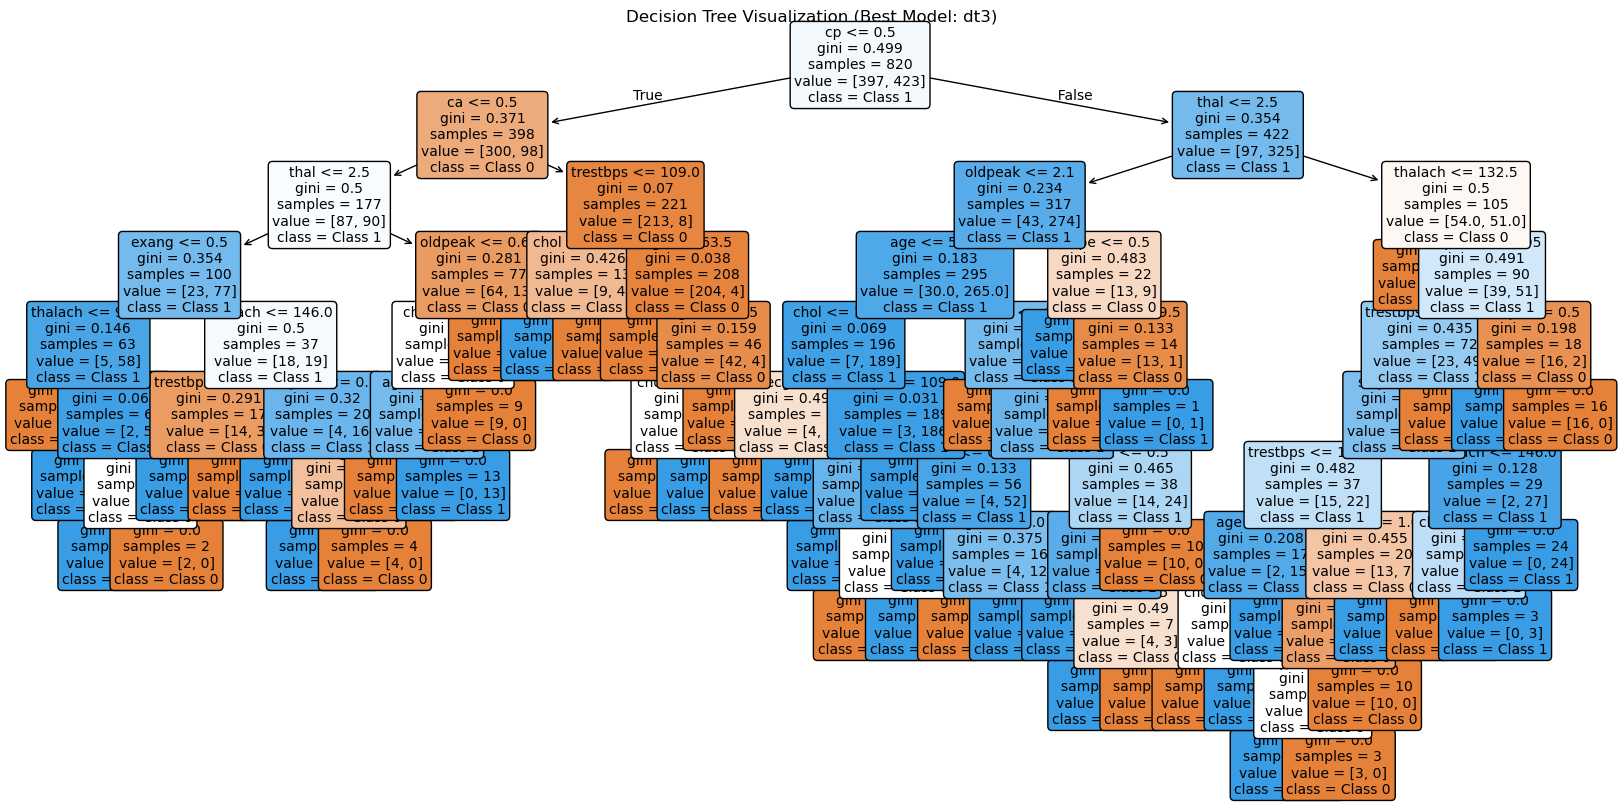

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

plot_tree(
    dt3,
    feature_names=X_train.columns,  
    class_names=['Class 0', 'Class 1'],  
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Visualization (Best Model: dt3)")
plt.show()


# Part H: Reflection Questions


### Why are Decision Trees suitable for medical datasets?
Decision Trees are well-suited for medical data because:

High interpretability → doctors can understand and trust the decisions

Handle non-linear relationships (symptoms ↔ diseases) naturally

Work well with mixed data types (lab values, age, gender, test results)

Require no feature scaling, which is common in medical measurements

Can handle missing values reasonably well (depending on implementation)

### What makes Decision Trees easy to interpret?

Decision Trees are easy to interpret because:

Decisions follow simple if–else rules

Each path from root to leaf represents a clear decision logic

Feature importance is explicit and visible

Visualizations clearly show why a prediction was made

### Why are Decision Trees commonly used in ensemble methods?

Decision Trees are used as base learners in ensembles because:

Individual trees have low bias but high variance

Ensembles like Random Forest reduce variance by averaging many trees

Boosting methods (Gradient Boosting, XGBoost) improve weak trees step-by-step

Trees are fast to train and flexible

# Finally Check with these below parameter
Compare criterion='gini' vs criterion='entropy'

Try min_samples_leaf manually

Write a short conclusion

Proper markdown explanations required


In [50]:
dt_gini = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)


dt_entropy = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

print("Gini Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))

Gini Accuracy: 0.9853658536585366
Entropy Accuracy: 0.9853658536585366


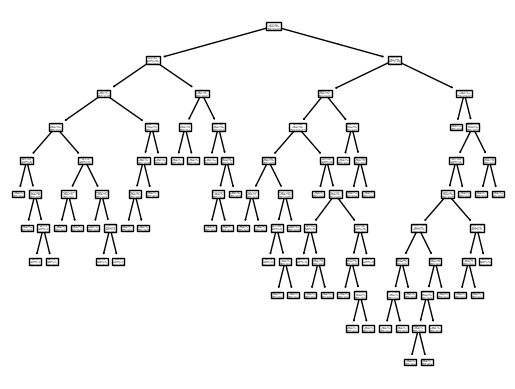

min_samples_leaf=1 | Train Acc=1.000 | Test Acc=0.985


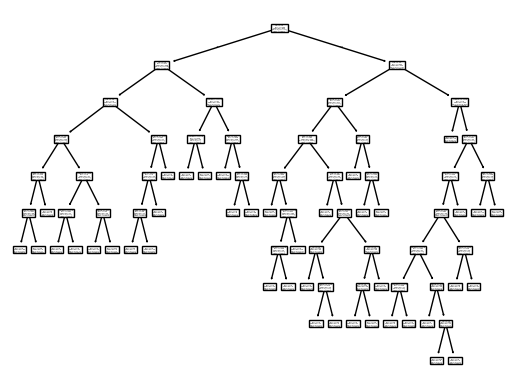

min_samples_leaf=5 | Train Acc=0.954 | Test Acc=0.898


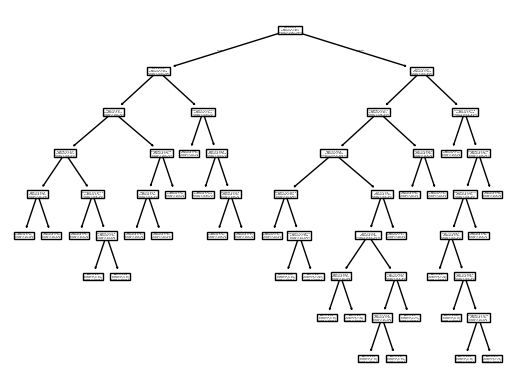

min_samples_leaf=10 | Train Acc=0.922 | Test Acc=0.859


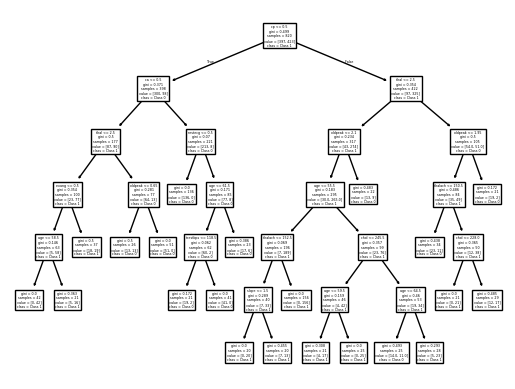

min_samples_leaf=20 | Train Acc=0.872 | Test Acc=0.795


In [54]:
for leaf_size in [1, 5, 10, 20]:
    dt = DecisionTreeClassifier(
        criterion='gini',
        random_state=42,
        min_samples_leaf=leaf_size
    )
    dt.fit(X_train, y_train)
    
    train_acc = dt.score(X_train, y_train)
    test_acc = accuracy_score(y_test, dt.predict(X_test))
    plot_tree(
    dt,
    feature_names=X_train.columns,  
    class_names=['Class 0', 'Class 1'],  
    
)
    plt.show()
    
    print(f"min_samples_leaf={leaf_size} | "
          f"Train Acc={train_acc:.3f} | Test Acc={test_acc:.3f}")



“The Decision Tree model performed equally well using both Gini and Entropy
criteria. Tuning the min_samples_leaf parameter had a significant impact on
performance. A smaller leaf size (min_samples_leaf = 1) provided the best
results, achieving high accuracy without harming generalization. Increasing the 
leaf size reduced overfitting but led to underfitting, demonstrating the bias–variance tradeoff.”